# Get all 12 target objects as templates

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from cv2 import threshold

In [2]:
%matplotlib inline

In [3]:
image = cv2.imread('2_objs.jpg')
image_gray =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# gaussian blur
gaussian_blur = cv2.GaussianBlur(
    image_gray,
    (5,5),
    0
)

(-0.5, 716.5, 2242.5, -0.5)

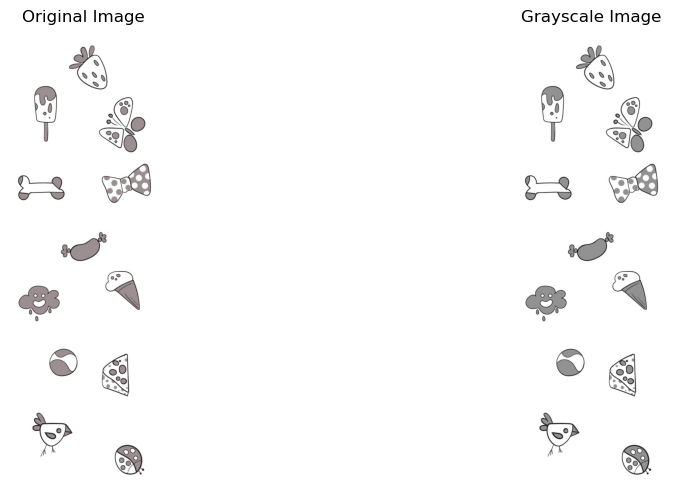

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

In [5]:
#
_, threshold = cv2.threshold(
    gaussian_blur,
    245,
    255,
    cv2.THRESH_BINARY_INV
)

# close the small space by dilation
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(threshold,kernel,iterations = 2)

# find the contours with threshold
contours, _ = cv2.findContours(
    dilated,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

In [6]:
object_count = 0

for contour in contours:
    # skip small area
    area = cv2.contourArea(contour)
    if area < 500:
        continue

    # create mask
    mask = np.zeros_like(image)

    # draw contour
    cv2.drawContours(
        mask,
        [contour],
        -1,
        (255, 255, 255),
        thickness=cv2.FILLED
    )

    object_image = cv2.bitwise_and(image, mask)

    # draw rectangle
    x, y, w, h = cv2.boundingRect(contour)

    cropped_object = object_image[y:y + h, x:x + w]

    cv2.imshow(f'Cropped Object {object_count + 1}', cropped_object)
    cv2.imwrite(f'2_objects/{object_count + 1}.jpg', cropped_object)

    object_count += 1